# **Tunisian Market Clustring**

### Author : Hamza Bouajila 

* **Adding Libraries**  


In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

*  **Load the dataset and create our dataframe**



In [7]:
import os 
os.getcwd()

'/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning'

In [3]:
os.chdir("../")

In [57]:
df = pd.read_csv("data/DataCoSupplyChainDataset.csv",delimiter=",",encoding="latin1")
df_acl = pd.read_csv("data/tokenized_access_logs.csv",delimiter=",",encoding="latin1")
df.sample(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
113512,PAYMENT,2,1,8.920000,37.490002,Late delivery,1,46,Indoor/Outdoor Games,Caguas,...,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,3/16/2015 20:13,First Class
124215,TRANSFER,5,4,9.380000,234.589996,Late delivery,1,71,Music,Caguas,...,NaN,1358,71,NaN,http://images.acmesports.sports/Rock+music,Rock music,260.649994,0,12/2/2017 17:36,Standard Class
50336,DEBIT,4,4,9.830000,86.989998,Shipping on time,0,9,Cardio Equipment,Muskegon,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,9/4/2017 18:26,Standard Class
20366,DEBIT,2,4,-81.209999,97.489998,Advance shipping,0,18,Men's Footwear,Caguas,...,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,4/8/2015 0:44,Standard Class
56925,DEBIT,5,4,19.219999,170.070007,Late delivery,1,17,Cleats,Caguas,...,19134.0,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,5/29/2016 13:49,Standard Class


In [59]:
df_acl.sample(5)

,Product,Category,Date,Month,Hour,Department,ip,url
163208,Nike Men's CJ Elite 2 TD Football Cleat,men's footwear,11/7/2017 11:48,Nov,11,apparel,57.154.252.51,/department/apparel/category/men's%20footwear/...
70237,Columbia Men's PFG Anchor Tough T-Shirt,shop by sport,10/21/2017 9:05,Oct,9,golf,149.209.224.109,/department/golf/category/shop%20by%20sport/pr...
398806,Perfect Fitness Perfect Rip Deck,cleats,9/25/2017 8:39,Sep,8,apparel,212.72.90.232,/department/apparel/category/cleats/product/Pe...
249823,adidas Men's Germany Black Crest Away Tee,girls' apparel,11/20/2017 9:43,Nov,9,golf,146.131.181.202,/department/golf/category/girls'%20apparel/pro...
230174,Field & Stream Sportsman 16 Gun Fire Safe,fishing,11/17/2017 14:37,Nov,14,fan shop,166.191.138.178,/department/fan%20shop/category/fishing/produc...


In [62]:
print(df_acl.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Ben

*  **Preprocessing**

> #### Checking data Types and null values

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

> #### Checking for data distribution and caracteristics

In [42]:
ohlc.describe()

,Open,High,Low,Close,Volume
count,187965.000000,187965.000000,187960.000000,187965.000000,1.879870e+05
mean,15.343251,15.440103,15.241624,15.360728,1.454330e+04
std,31.804620,31.935038,31.673683,31.821089,7.824436e+04
min,0.120000,0.130000,0.120000,0.120000,0.000000e+00
25%,3.570000,3.600000,3.513823,3.575000,4.300000e+02
50%,7.200000,7.250000,7.121073,7.200000,2.341000e+03
75%,14.480000,14.530000,14.390000,14.490000,9.150000e+03
max,602.750000,602.750000,602.750000,602.750000,8.264824e+06


*  **Exploratory Data Analysis**

#### There is big differences between values , let us normalise the values

In [43]:
for col in ohlc[['Open', 'High', 'Low', 'Close', 'Volume']].columns: 
    ohlc[col] = ohlc[col]/ohlc[col].max()
    ohlc[col] = np.log(ohlc[col])
ohlc.sample(5)

/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Ticker,Date,Open,High,Low,Close,Volume
32266,BHL,2022-09-23,-5.888679,-5.876774,-5.888679,-5.888679,-10.019436
45470,BTE,2017-12-12,-3.571825,-3.571825,-3.601785,-3.601785,-11.209020
175963,UADH,2021-06-01,-6.730007,-6.716213,-6.758177,-6.730007,-3.355568
149036,STPIL,2020-05-12,-3.989167,-3.946196,-3.989167,-3.954817,-9.567945
147374,STPAP,2018-09-12,-4.772262,-4.752844,-4.792065,-4.782114,-5.154560


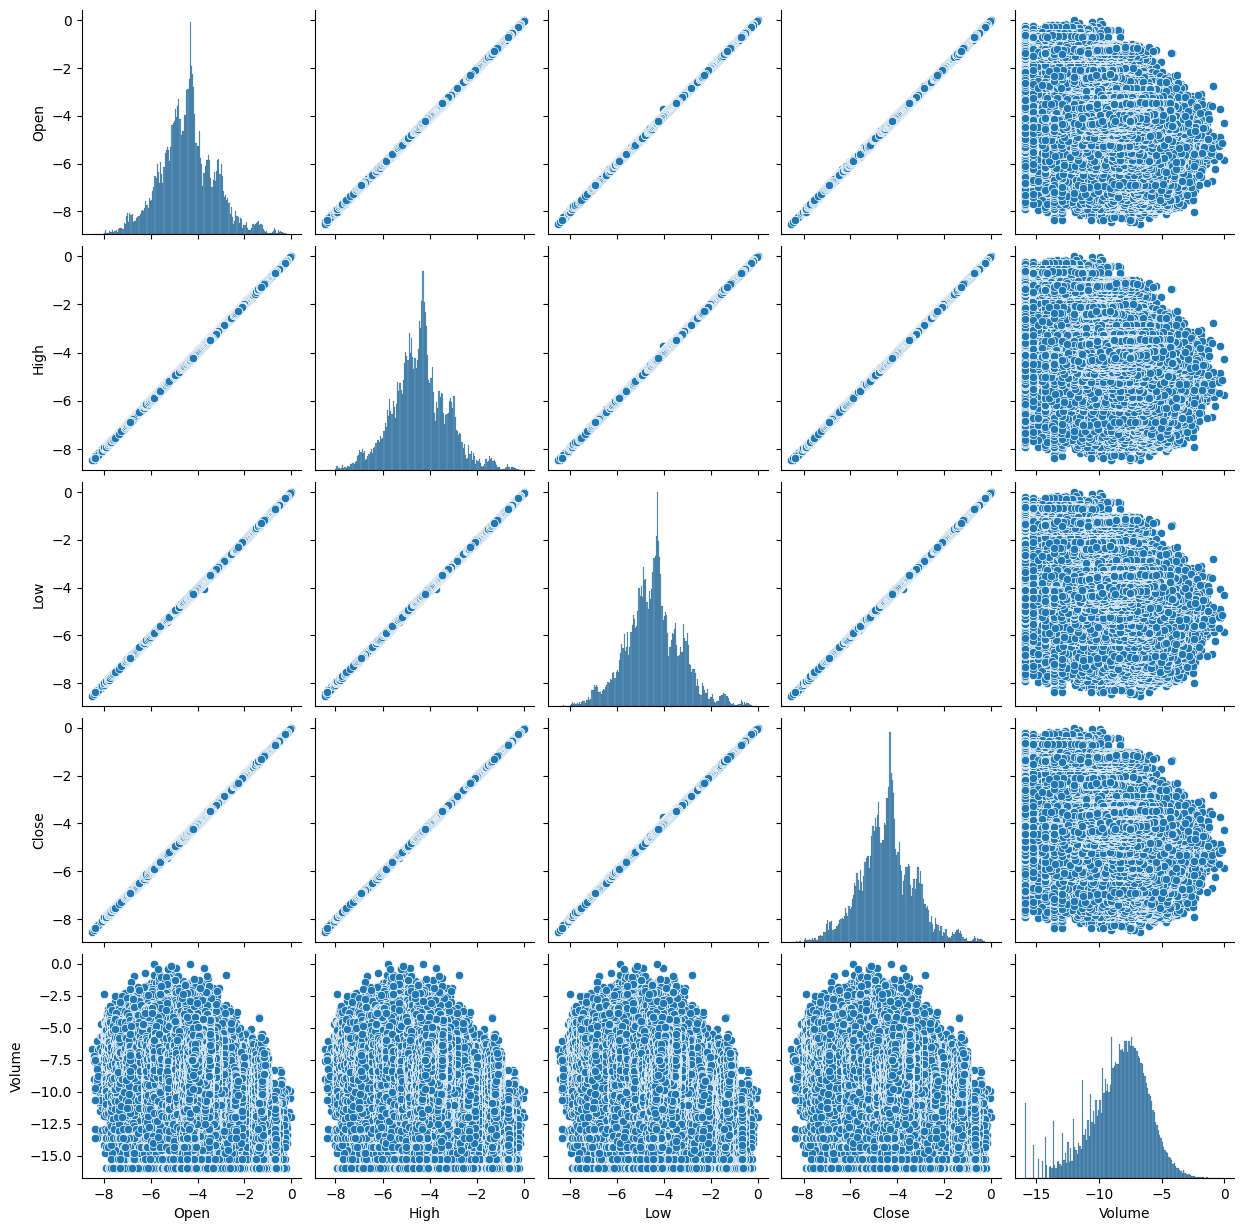

In [20]:
sns.pairplot(data = ohlc)

> #### ---> looks like there is some skewness , let us apply log

### Verifying Linear Relationships

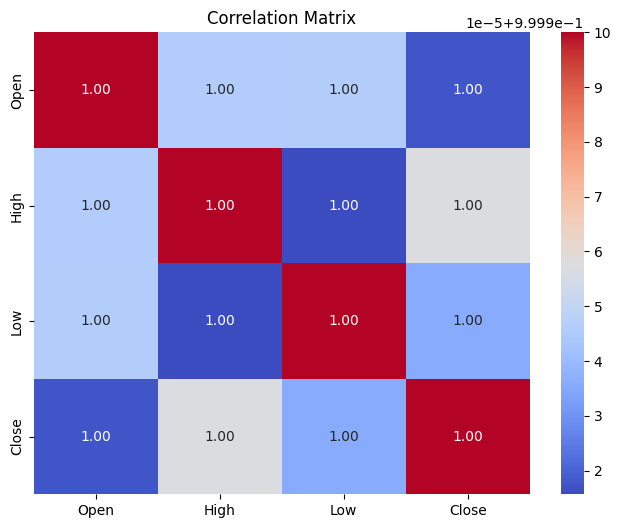

In [44]:
# Compute the correlation matrix
correlation_matrix = ohlc[['Open', 'High', 'Low', 'Close']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## There is strong correlation so let us feature engineer a bit

In [45]:
ohlc["price_range"] = ohlc["High"] - ohlc["Low"]
ohlc["volatility"] = ohlc["price_range"] / ohlc["Close"]
ohlc["average_price"] = ohlc["Open"] + ohlc["Close"] / 2
ohlc.sample(5)

,Ticker,Date,Open,High,Low,Close,Volume,price_range,volatility,average_price
162956,TJL,2014-01-08,-3.202829,-3.202829,-3.202829,-3.202829,-10.903638,0.000000,-0.000000,-4.804244
108391,SFBT,2015-06-02,-3.269275,-3.266008,-3.269275,-3.268911,-8.697680,0.003266,-0.000999,-4.903730
12691,AMS,2016-08-29,-5.797187,-5.770231,-5.797187,-5.770231,-13.154930,0.026956,-0.004672,-8.682302
46206,BTE,2013-04-30,-3.104185,-3.104185,-3.104185,-3.104185,-12.931787,0.000000,-0.000000,-4.656278
10574,ALKIM,2016-06-16,-2.948345,-2.948345,-2.948345,-2.948345,-12.931787,0.000000,-0.000000,-4.422518


In [46]:
ohlc.describe()

/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Open,High,Low,Close,Volume,price_range,volatility,average_price
count,187965.000000,187965.000000,187960.000000,187965.000000,1.879870e+05,187960.000000,187959.000000,187965.000000
mean,-4.429656,-4.421601,-4.438703,-4.428392,-inf,0.017050,-0.003992,-6.643852
std,1.165688,1.164375,1.167569,1.165786,NaN,0.015480,0.004374,1.748548
min,-8.521766,-8.441723,-8.521766,-8.521766,-inf,0.000000,-0.671685,-12.782649
25%,-5.128937,-5.120569,-5.144798,-5.127537,-9.863734e+00,0.002721,-0.005931,-7.694839
50%,-4.427421,-4.420501,-4.438444,-4.427421,-8.169186e+00,0.015038,-0.003396,-6.641827
75%,-3.728734,-3.725287,-3.734969,-3.728044,-6.806010e+00,0.027399,-0.000647,-5.593802
max,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.320720,-0.000000,0.000000


In [47]:
for col in ["average_price", "price_range", "volatility"]:
    ohlc[col] = np.log(ohlc[col])
    ohlc[col] = ohlc[col]/ohlc[col].max()
ohlc.describe()

/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/media/hamza/Disque local/Hamza Bouajila/Portfolio/Prediction-Using-Unsupervised-ML/machine_learning/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encoun

,Open,High,Low,Close,Volume,price_range,volatility,average_price
count,187965.000000,187965.000000,187960.000000,187965.000000,1.879870e+05,1.879600e+05,0.0,0.0
mean,-4.429656,-4.421601,-4.438703,-4.428392,-inf,inf,NaN,NaN
std,1.165688,1.164375,1.167569,1.165786,NaN,NaN,NaN,NaN
min,-8.521766,-8.441723,-8.521766,-8.521766,-inf,1.000000e+00,NaN,NaN
25%,-5.128937,-5.120569,-5.144798,-5.127537,-9.863734e+00,3.163284e+00,NaN,NaN
50%,-4.427421,-4.420501,-4.438444,-4.427421,-8.169186e+00,3.690843e+00,NaN,NaN
75%,-3.728734,-3.725287,-3.734969,-3.728044,-6.806010e+00,5.194147e+00,NaN,NaN
max,0.000000,0.000000,0.000000,0.000000,0.000000e+00,inf,NaN,NaN


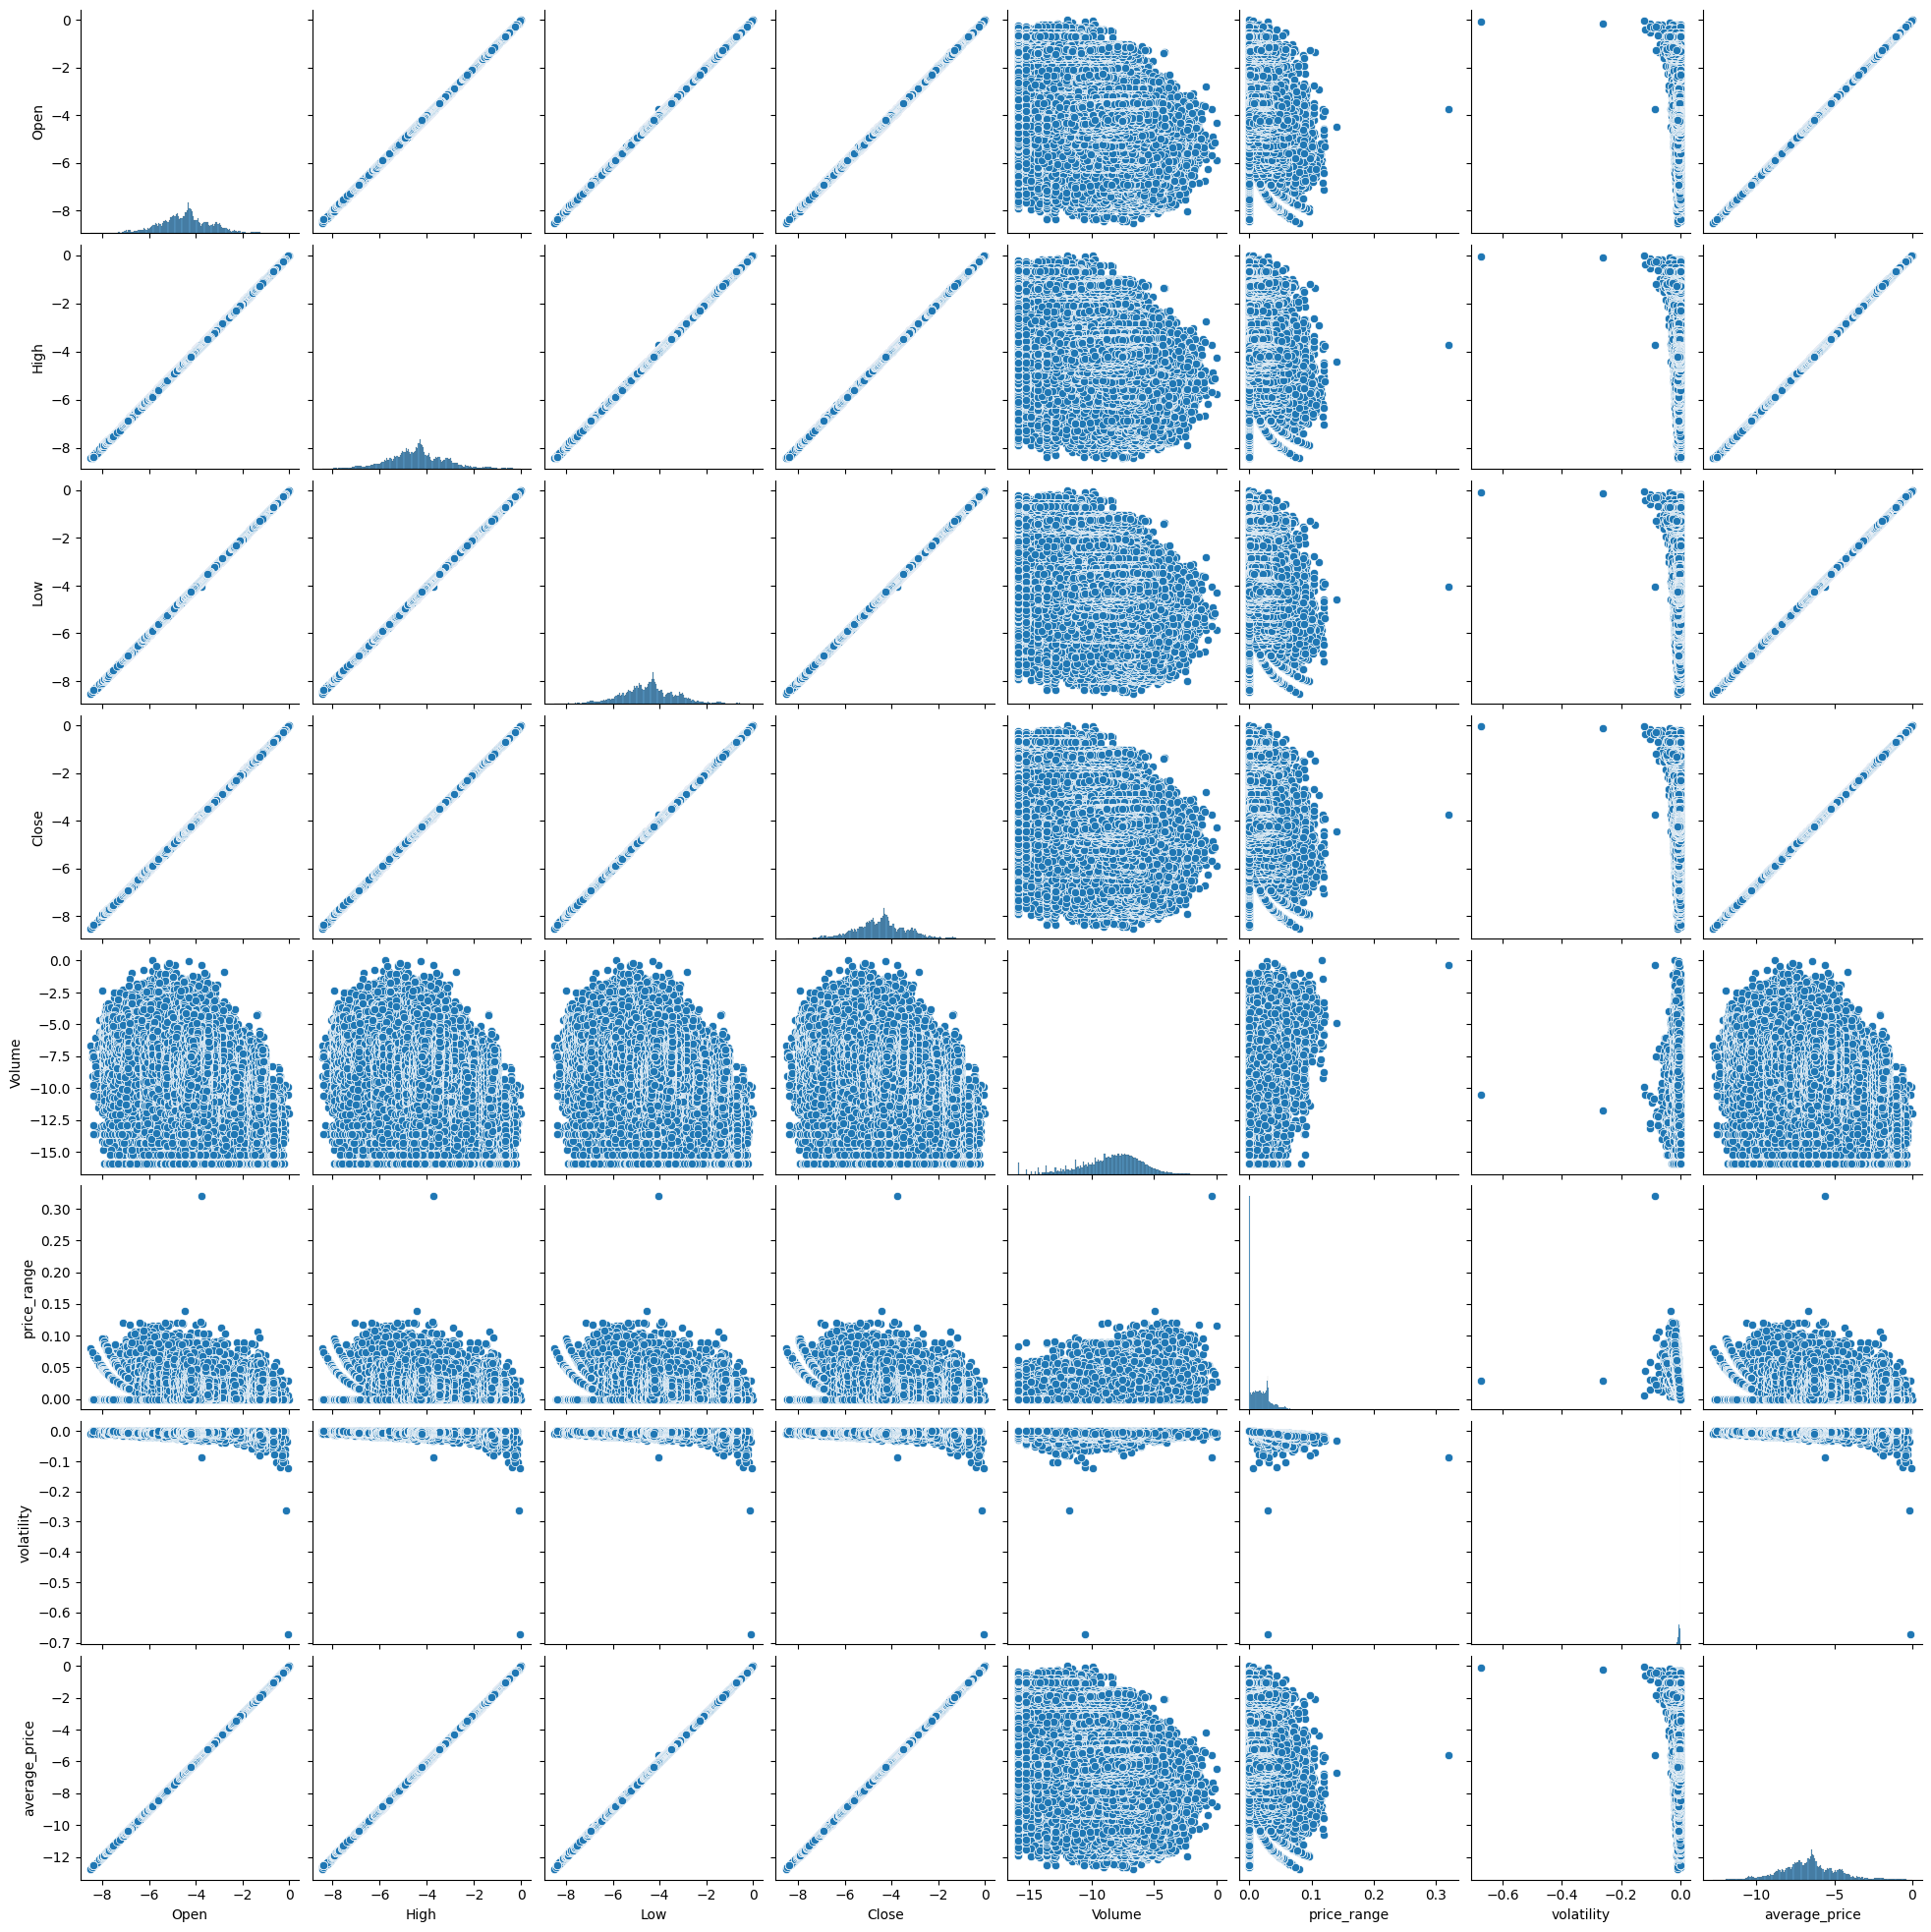

In [28]:
sns.pairplot(data=ohlc)

#### KMeans method

In [7]:
'''Elbow Methode'''
from sklearn.cluster import KMeans
iris_df = ohlc.iloc[:, [0, 1, 2, 3]].values
sum_of_squared_distances=[]
K=range(2,10)
for i in K:
    Km=KMeans(n_clusters=i)
    Km=Km.fit(iris_df)#train du kmeans
    sum_of_squared_distances.append(Km.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

*  **plotting the result**

Text(0.5, 1.0, 'Elbow ethod For Optimal K')

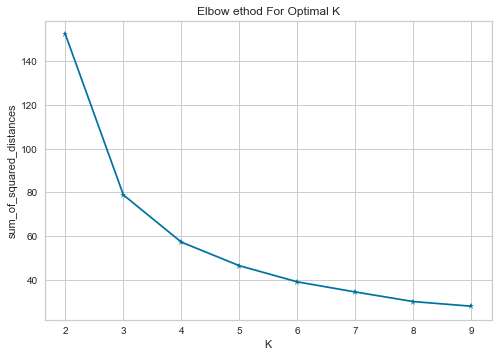

In [8]:
plt.figure()
plt.plot(K,sum_of_squared_distances,'b*-')
plt.xlabel('K')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow ethod For Optimal K')

> #### ---> The elbow is exactly in 3 so we have 3 clusters

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris_df)
Label=kmeans.labels_
centers=kmeans.cluster_centers_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
Label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

*  **plotting the result**

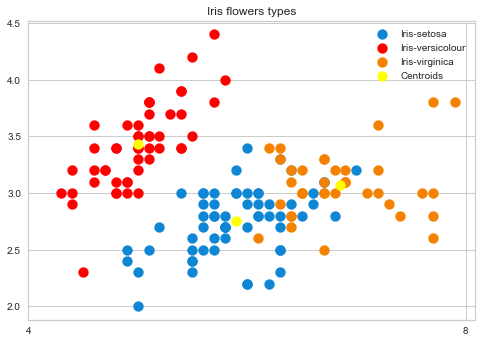

In [12]:
plt.scatter(iris_df[Label == 0, 0], iris_df[Label == 0, 1], 
            s = 100, c = '#0E86D4', label = 'Iris-setosa');
plt.scatter(iris_df[Label == 1, 0], iris_df[Label == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour');
plt.scatter(iris_df[Label == 2, 0], iris_df[Label == 2, 1],
            s = 100, c = '#f48200', label = 'Iris-virginica');
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids');
plt.title('Iris flowers types')
plt.xticks([4,8]);
plt.legend();

In [13]:
'''Coefficient of silhouette'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


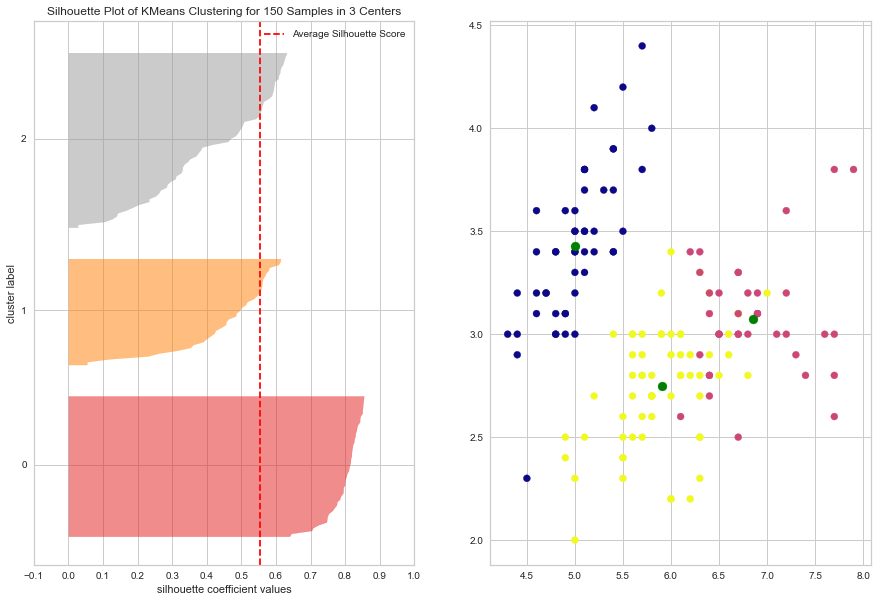

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


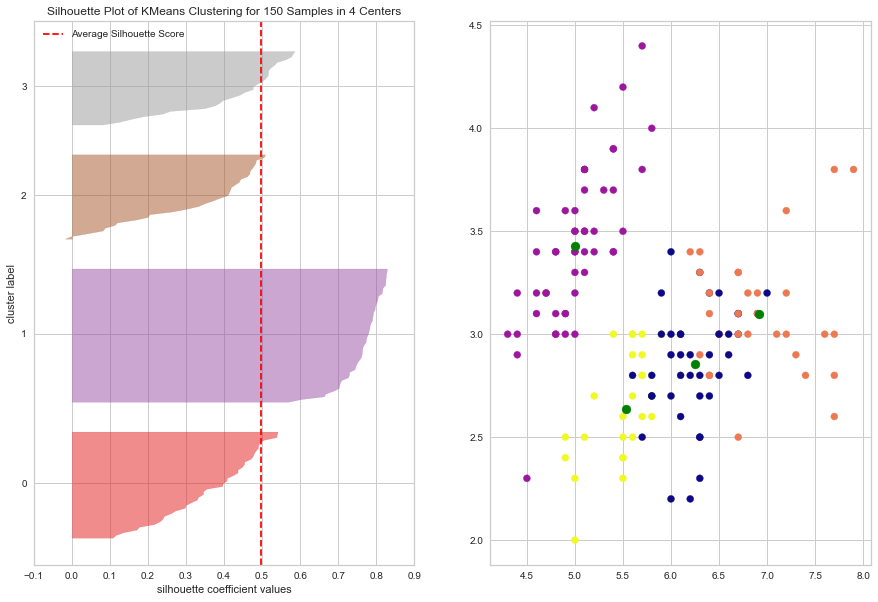

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


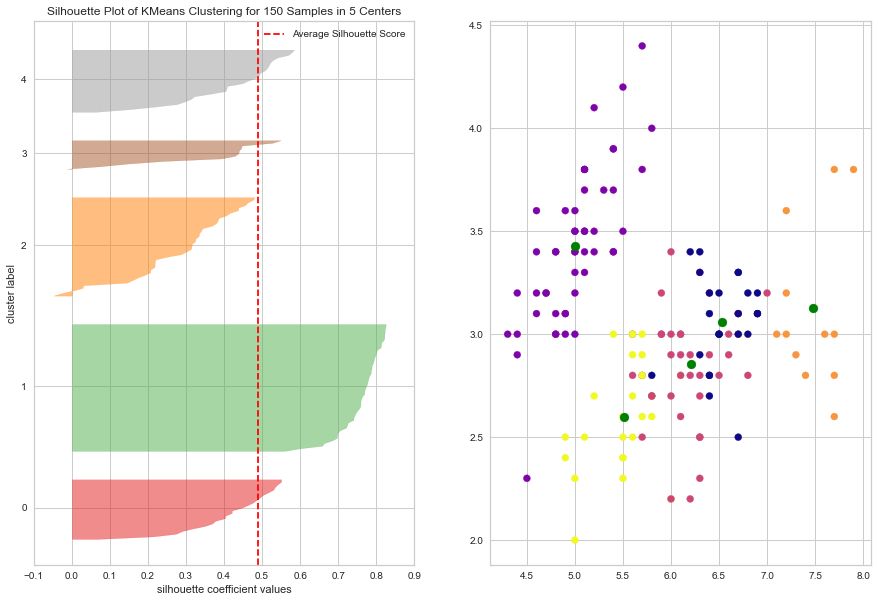

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


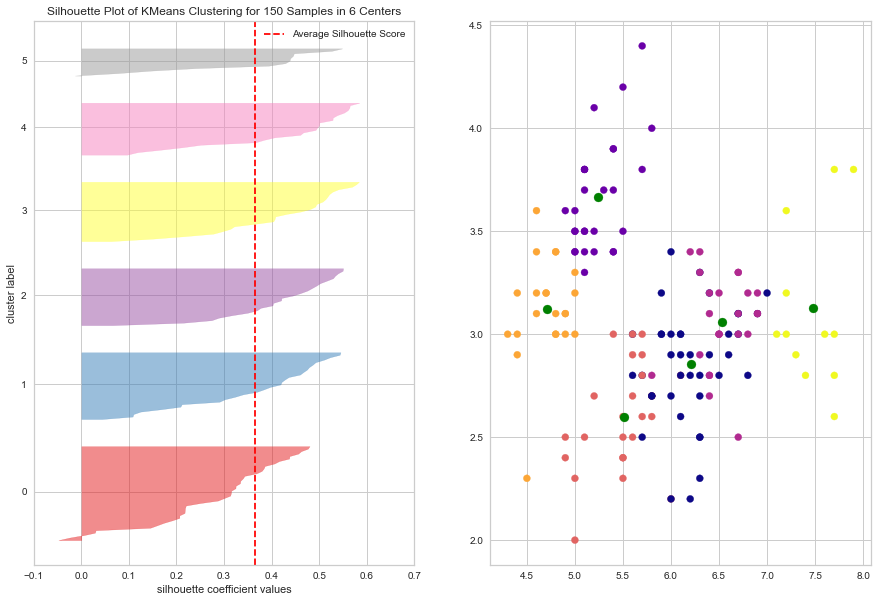

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


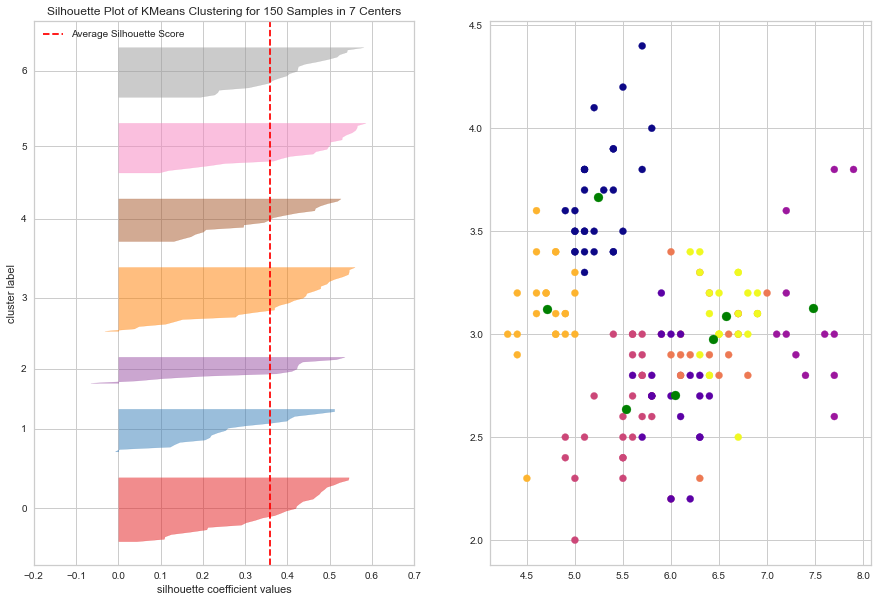

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


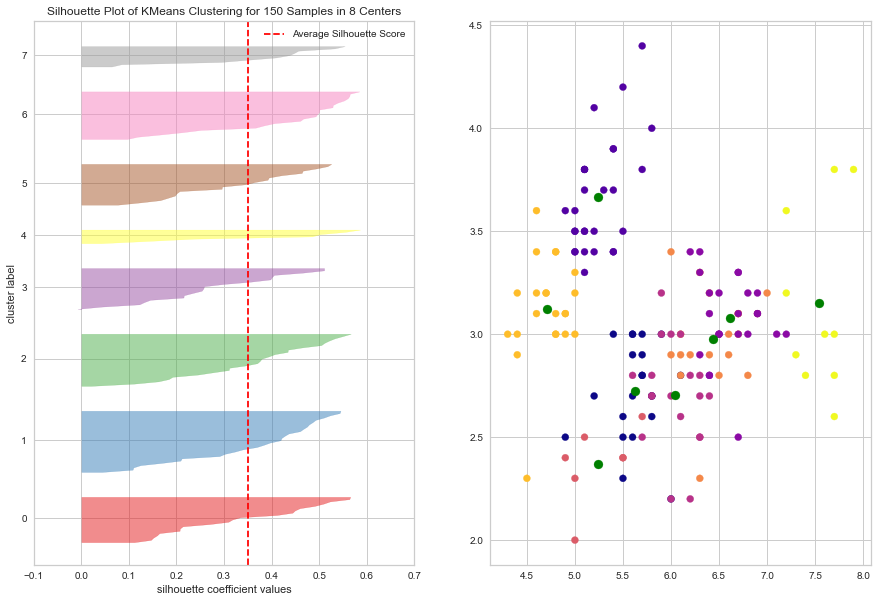

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


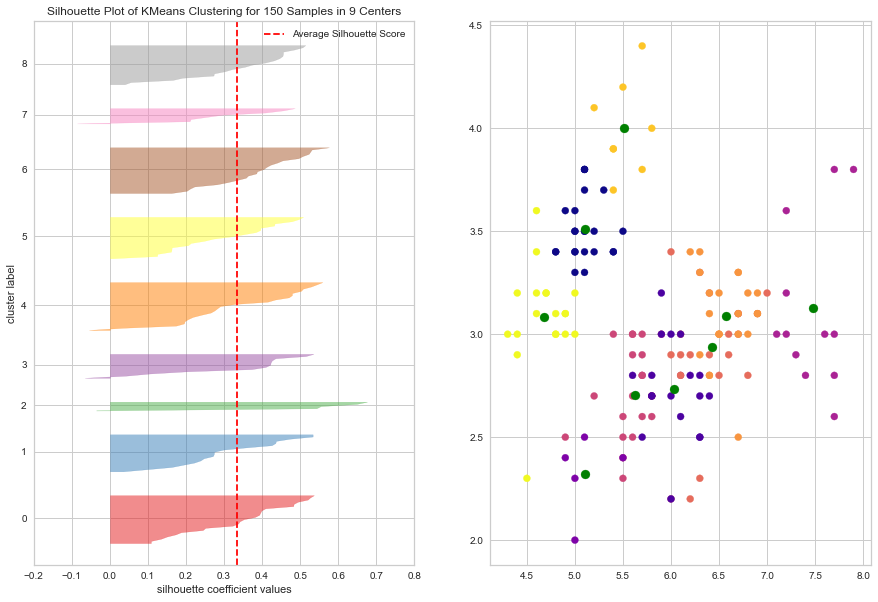

In [15]:
K=range(3,10)
for i in K:
    Km=KMeans(n_clusters=i)
    Km=Km.fit(iris_df)#train du kmeans
    labels=Km.labels_
    centers=Km.cluster_centers_
    score=silhouette_score(iris_df,labels)
   
    #print(i,":",score)
    plt.figure(figsize=(15, 10))
    plt.subplot(1,2,2)
    plt.scatter(iris_df[:,0],iris_df[:,1],c=labels,cmap="plasma") #c=labels :each cluster with each color coulour
    plt.scatter(centers[:,0],centers[:,1],c='green',s=80)
    #cmap=plasma==>use customs colors
    plt.subplot(1,2,1)
    model = SilhouetteVisualizer(Km)
    model.fit(iris_df)
    model.show()

In [16]:
#silhouette avg 
k=range(3,10)
for i in k:
    cluster=KMeans(n_clusters=i)
    cluster_labels=cluster.fit_predict(iris_df)
    silhouette_avg=silhouette_score(iris_df,cluster_labels)
    print("For n_clusters=",i,"the average silhouette_score is :",silhouette_avg)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 3 the average silhouette_score is : 0.5528190123564091


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 4 the average silhouette_score is : 0.4980505049972867


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 5 the average silhouette_score is : 0.4887488870931048


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 6 the average silhouette_score is : 0.3648340039670018


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 7 the average silhouette_score is : 0.3543964478588638


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 8 the average silhouette_score is : 0.336752619534776


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters= 9 the average silhouette_score is : 0.3402234017590561


# **As we can see here in the result when n_cluster=3 we have the high silhouette_score**



### Exploring Alternative Clustering Methods: DBSCAN and Hierarchical Clustering

In [27]:
# from sklearn.cluster import DBSCAN
# from scipy.cluster.hierarchy import dendrogram, linkage

# # DBSCAN Clustering
# dbscan = DBSCAN(eps=0.05, min_samples=5)
# ohlc['DBSCAN_Labels'] = dbscan.fit_predict(ohlc[['Open', 'High', 'Low', 'Close']].dropna(inplace=True))

# # Plot DBSCAN results
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=ohlc, x='Open', y='Close', hue='DBSCAN_Labels', palette='viridis')
# plt.title('DBSCAN Clustering Results')
# plt.show()

# # Hierarchical Clustering
# linked = linkage(ohlc[['Open', 'High', 'Low', 'Close']], method='ward')
# plt.figure(figsize=(10, 7))
# dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.show()